<a href="https://colab.research.google.com/github/mainek2004/DataAnalysis_25_26/blob/mai/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) in Python

##Introduction


Exploratory Data Analysis of the Pima Indians Diabetes dataset




The features present in the dataset are:

  Pregnancies: Số lần mang thai

  Glucose (plasma glucose concentration): Nồng độ glucose trong huyết tương

  Blood Pressure (diastolic): Huyết áp tâm trương

  Skin Thickness: Độ dày lớp da

  Insulin

  BMI (Body Mass Index)

  Diabetes Pedigree Function (a function that scores likelihood of diabetes based on family history): Hàm số phả hệ bệnh dựa trên tiền sử gia đình

  Age

The target "Outcome" has 2 classes:
0: Non-diabetes
1: diabetes

Initial EDA
How: Using powerfull python moduls [pandas, matplotlib, and seaborn]



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Load the dataset

In [6]:
import pandas as pd

# Danh sách tên cột tương ứng với thứ tự trong file
column_names = [
    'Pregnancies',  # Số lần mang thai
    'Glucose',  # Nồng độ glucose sau 2 giờ
    'BloodPressure',  # Huyết áp tâm trương (mm Hg)
    'SkinThickness',  # Độ dày lớp da tam đầu (mm)
    'Insulin',  # Nồng độ insulin sau 2 giờ (mu U/ml)
    'BMI',  # Chỉ số khối cơ thể (kg/m²)
    'DiabetesPedigreeFunction',  # Hàm số phả hệ bệnh đái tháo đường
    'Age',  # Tuổi (năm)
    'Outcome'  # Biến phân loại: 0 (không mắc) hoặc 1 (mắc bệnh)
]

# Đọc file CSV không có tiêu đề
df = pd.read_csv('/content/drive/MyDrive/Data_Analysis/pima_indians_diabetes/pima-indians-diabetes.data.csv', header=None, names=column_names)

# Kiểm tra dữ liệu
df.to_csv('/content/drive/MyDrive/Data_Analysis/pima_indians_diabetes/pima_diabetes_header.csv', index=False)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Analysis/pima_indians_diabetes/pima-indians-diabetes.data.csv')

##A first look and non-graphical EDA


In [7]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [8]:
df.shape


(768, 9)

In [9]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

###Are the classes (species) balanced?


In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:

#kiểm tra giá trị 0 không hợp lý về mặt sinh lý học
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_to_check] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [20]:

#Chuẩn hóa giá trị bằng median (tính trung vị)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay thế giá trị 0 bằng median của từng cột (chỉ tính median từ các giá trị khác 0)
for col in cols_to_fix:
    median = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median)

# Kiểm tra lại sau khi xử lý
print((df[cols_to_fix] == 0).sum())


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [22]:
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

###Correlation Between Variables (sự tương quan giữa các biến)


In [23]:
import numpy as np
import pandas as pd

# Kiểm tra phân bố nhãn
labels, counts = np.unique(df["Outcome"], return_counts=True)
print(dict(zip(labels, counts)))

# Tính ma trận tương quan
correlation_matrix = df.corr()
print(correlation_matrix)


{np.int64(0): np.int64(500), np.int64(1): np.int64(268)}
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559              

##Graphical EDA



Let's start from where we reached for the non-graphical EDA



###Are the classes (Outcome) balanced?


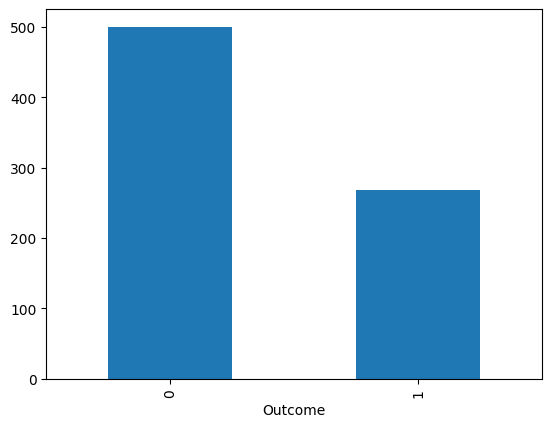

In [24]:
#Using pandas
df["Outcome"].value_counts().plot.bar()
plt.savefig("Outcome_hist.png")

<BarContainer object of 2 artists>

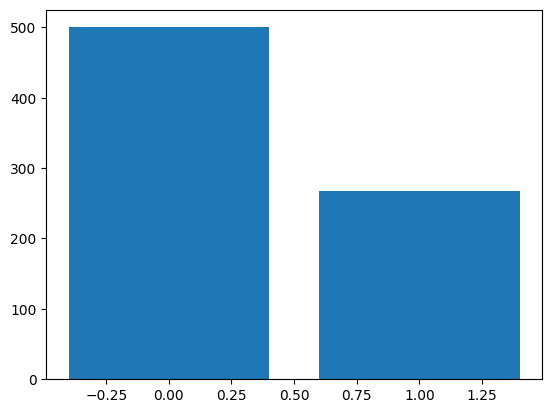

In [25]:
#Using matplotlib

counts = df["Outcome"].value_counts()
plt.bar(counts.index, counts.values)

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

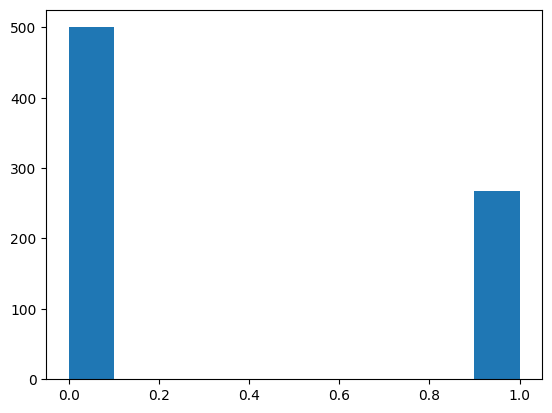

In [26]:
plt.hist(df['Outcome'])


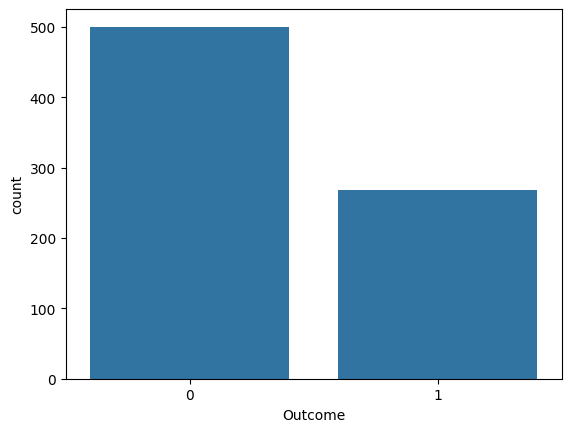

In [28]:
#Using seaborn
sns.countplot(x = df['Outcome']);


What we can conclude:
- Outcome distribution: The dataset consists of roughly 65% samples with Outcome = 0 (non-diabetic) and 35% with Outcome = 1 (diabetic). This distribution is not severely imbalanced, which means common evaluation metrics such as Accuracy, Precision, Recall, F1-score, and ROC AUC can be reliably applied without the need for data balancing techniques (e.g., oversampling or undersampling).

- Data preprocessing: Unrealistic zero values in medical features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) were replaced with the median of each corresponding feature. This approach eliminates invalid values while preserving the natural distribution of the data.

- Significance: After replacement, the dataset is cleaner and more representative of real-world medical data, providing a more reliable basis for model training and improving the accuracy of diabetes prediction.

In [44]:
#dùng Accuracy dự đoán mắc bệnh bao nhiêu phần trăm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Ví dụ: Load bộ dữ liệu Pima Diabetes (CSV)
df = pd.read_csv("/content/drive/MyDrive/Data_Analysis/pima_indians_diabetes/pima_diabetes_header.csv")

# Tách đặc trưng và nhãn
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán trên test set
y_pred = model.predict(X_test)

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7468


###Comparison graphs


Scatterplots

What?
 - uses the Cartesian coordinate system (x-y axes) to display the values of two variables in a dataset.

Why ?
 - Scatterplots help visualize the relationship between two variables — for example: does BMI increase as Glucose increases?

Very useful for:
 - Detecting trends
 - Checking correlation
 - Identifying outliers

<Axes: xlabel='Glucose', ylabel='BMI'>

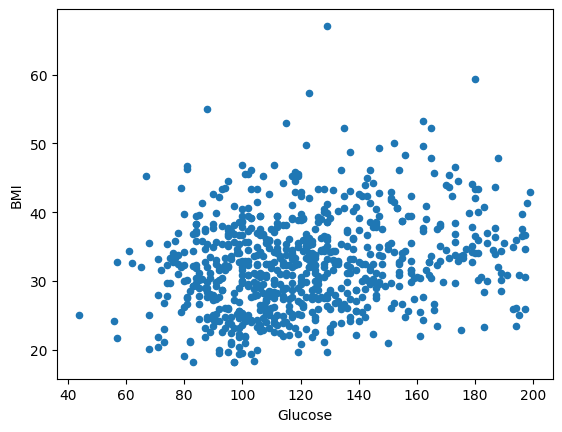

In [29]:
#Scatterplot using pandas
df.plot.scatter('Glucose','BMI')


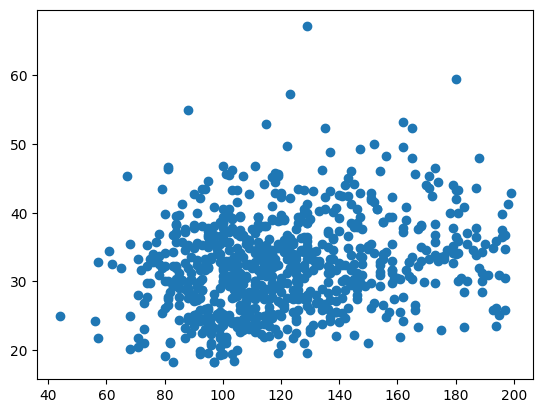

In [30]:
#Scatterplot using matplotlib
plt.scatter('Glucose', 'BMI', data=df)


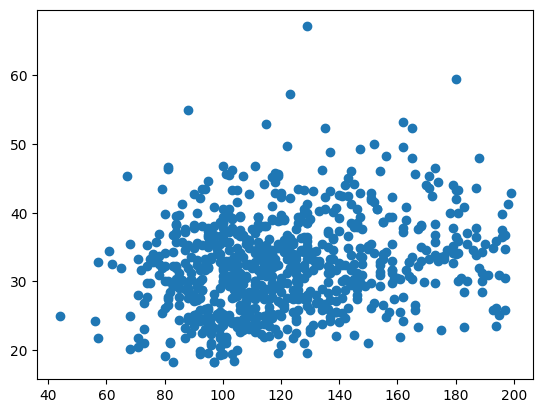

In [31]:
plt.scatter(df['Glucose'], df['BMI'])


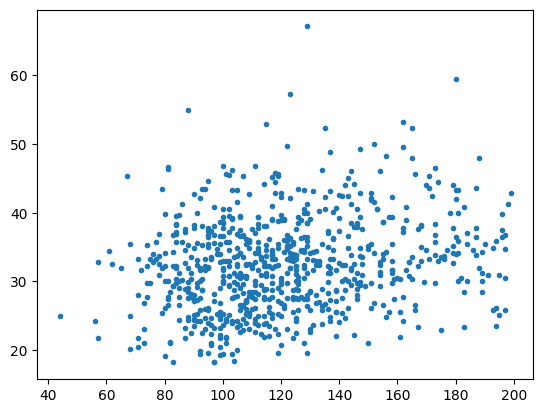

In [32]:
plt.plot('Glucose', 'BMI', data=df, marker='.',linestyle='none')


<Axes: xlabel='Glucose', ylabel='BMI'>

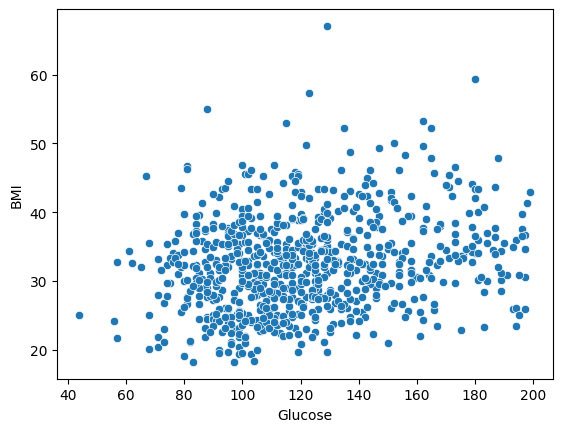

In [33]:
#Scatterplot using seaborn
sns.scatterplot(x='Glucose', y='BMI', data=df)

<Axes: xlabel='Glucose', ylabel='BMI'>

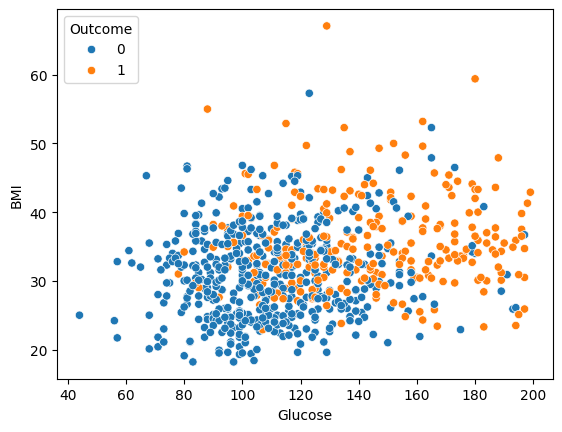

In [35]:
sns.scatterplot(x = 'Glucose', y = 'BMI', hue=df['Outcome'], data=df)


What we can conclude:

- Patients with diabetes (Outcome = 1) tend to have higher glucose levels, BMI, and age compared to non-diabetic patients.

- Non-diabetic cases (Outcome = 0) usually show lower glucose and BMI values, and often fall in the younger age range.

- Some features such as Insulin and SkinThickness show large variation but still indicate higher median values in diabetic cases.

- As seen above, different visualization tools could be used; from now on, only seaborn plots are demonstrated, while others are left for you to explore.

###Correlogram


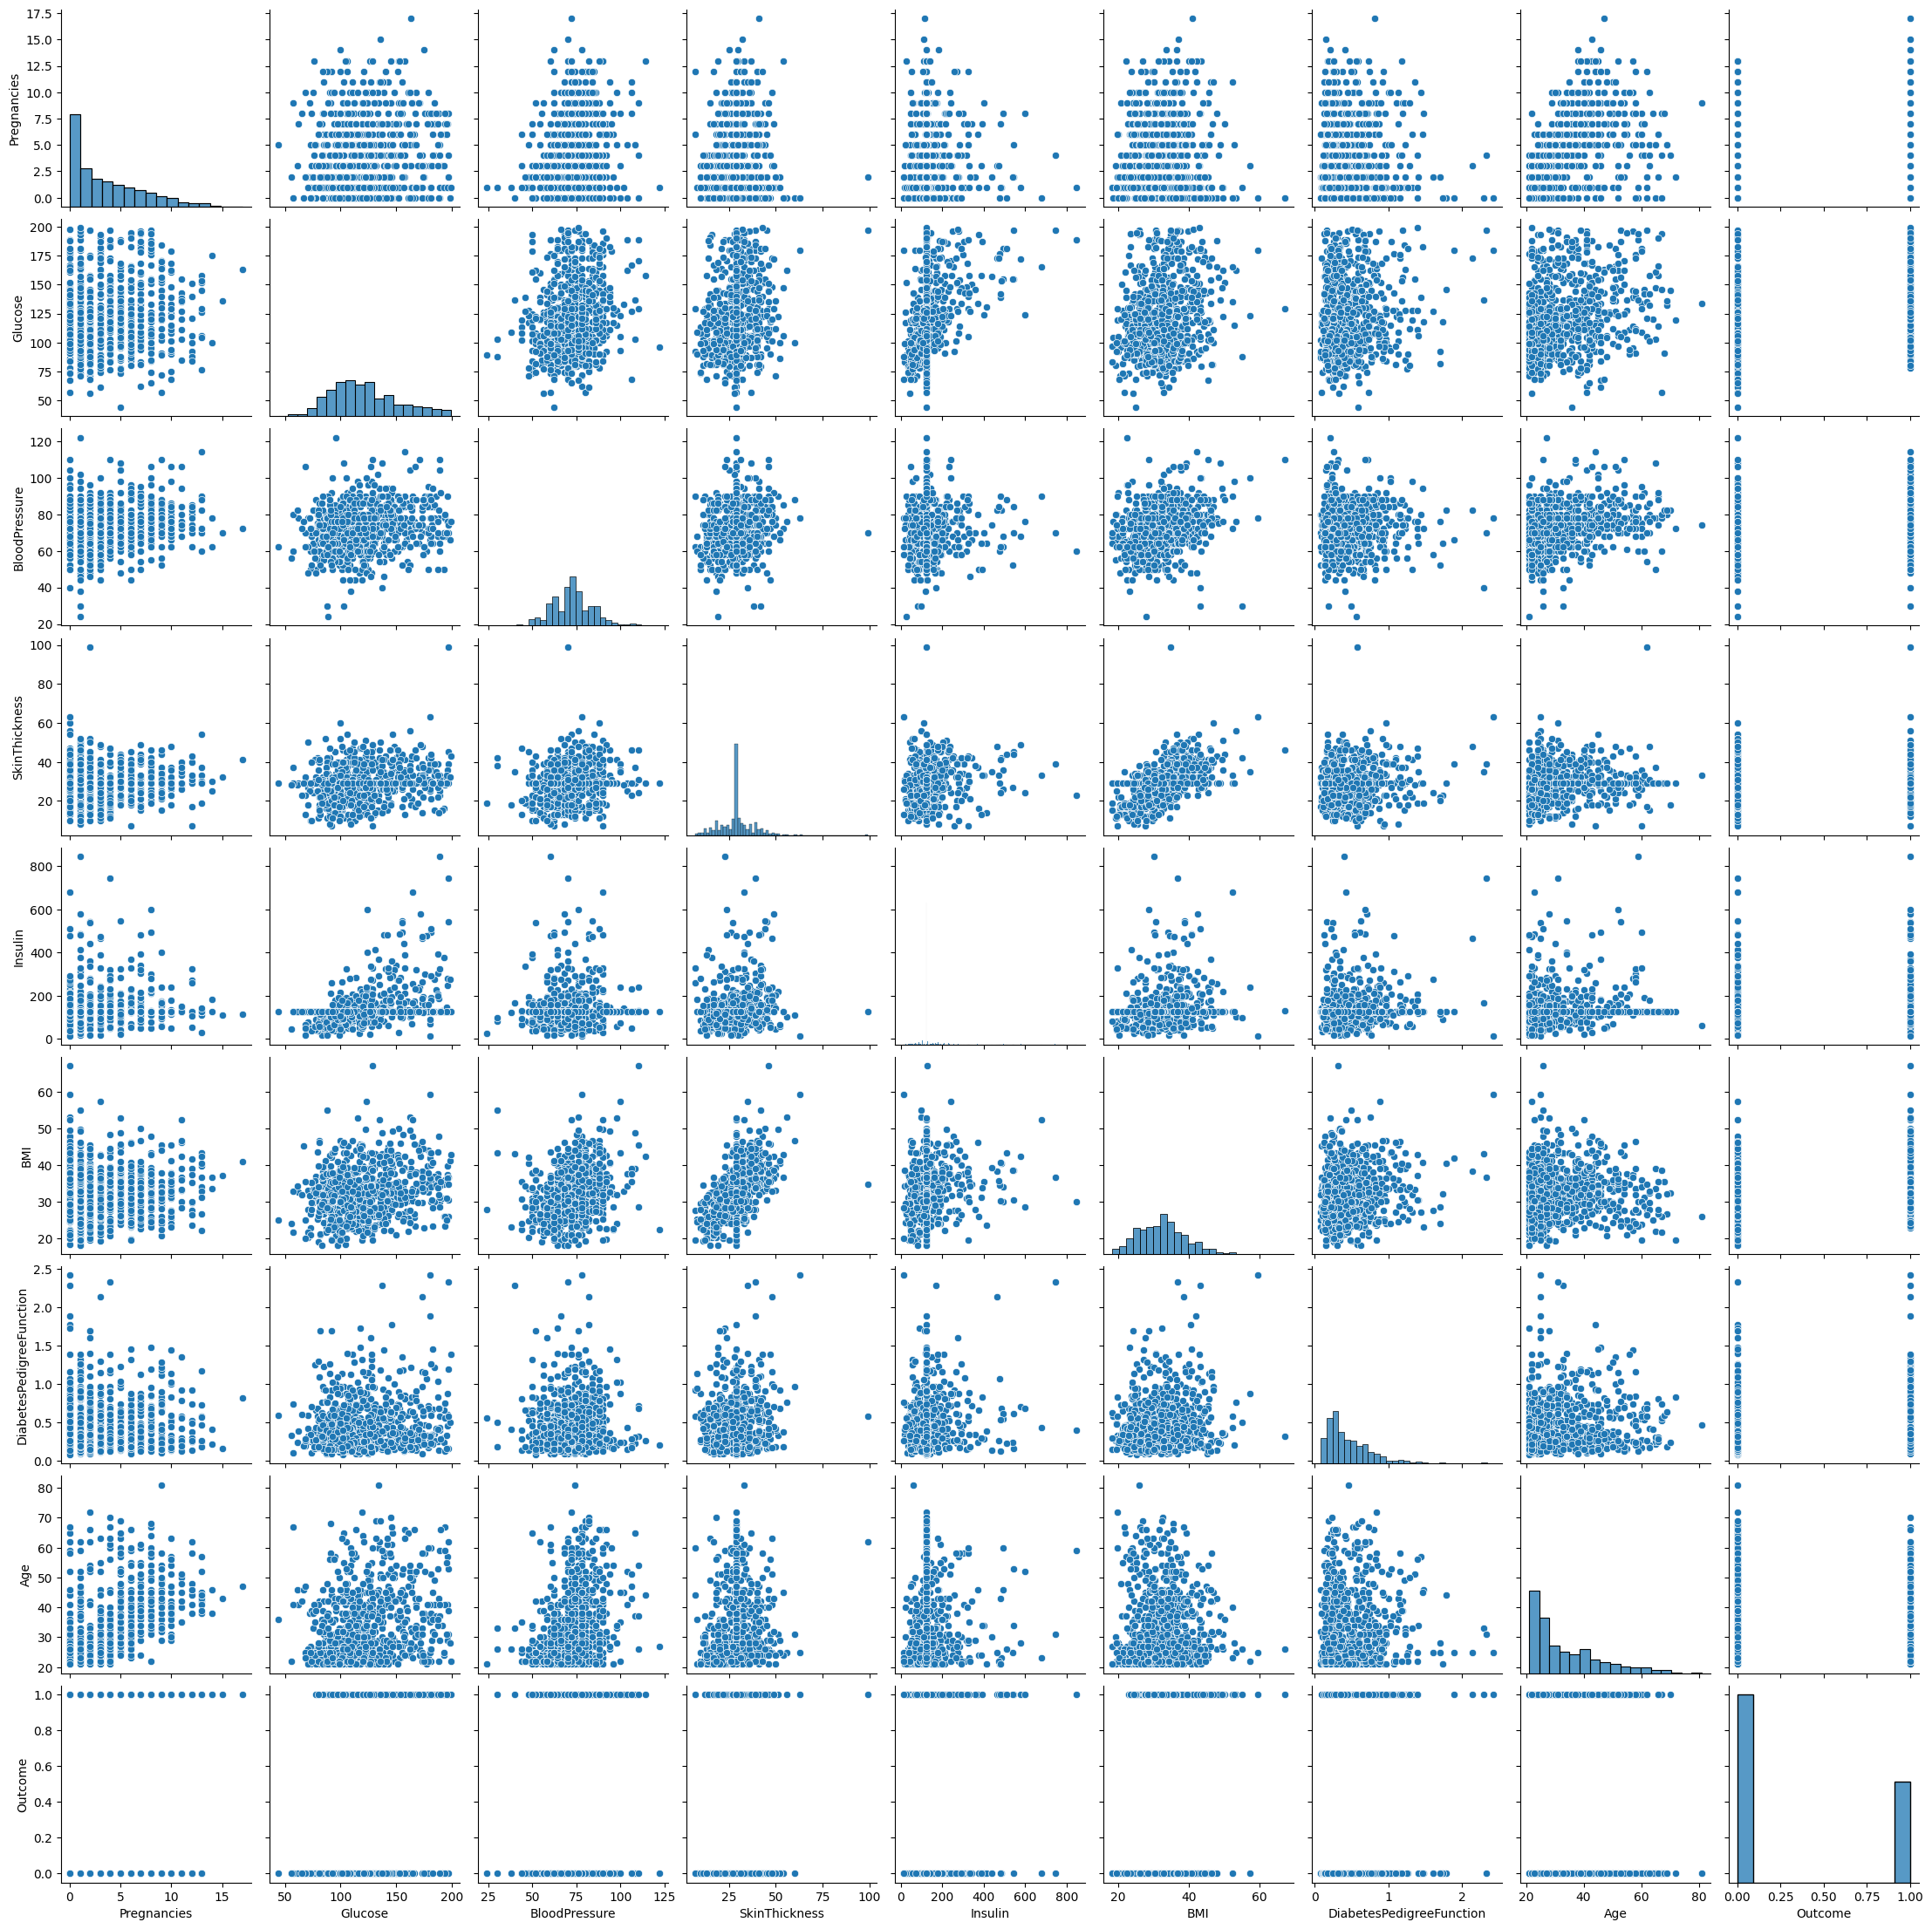

In [36]:
sns.pairplot(df)


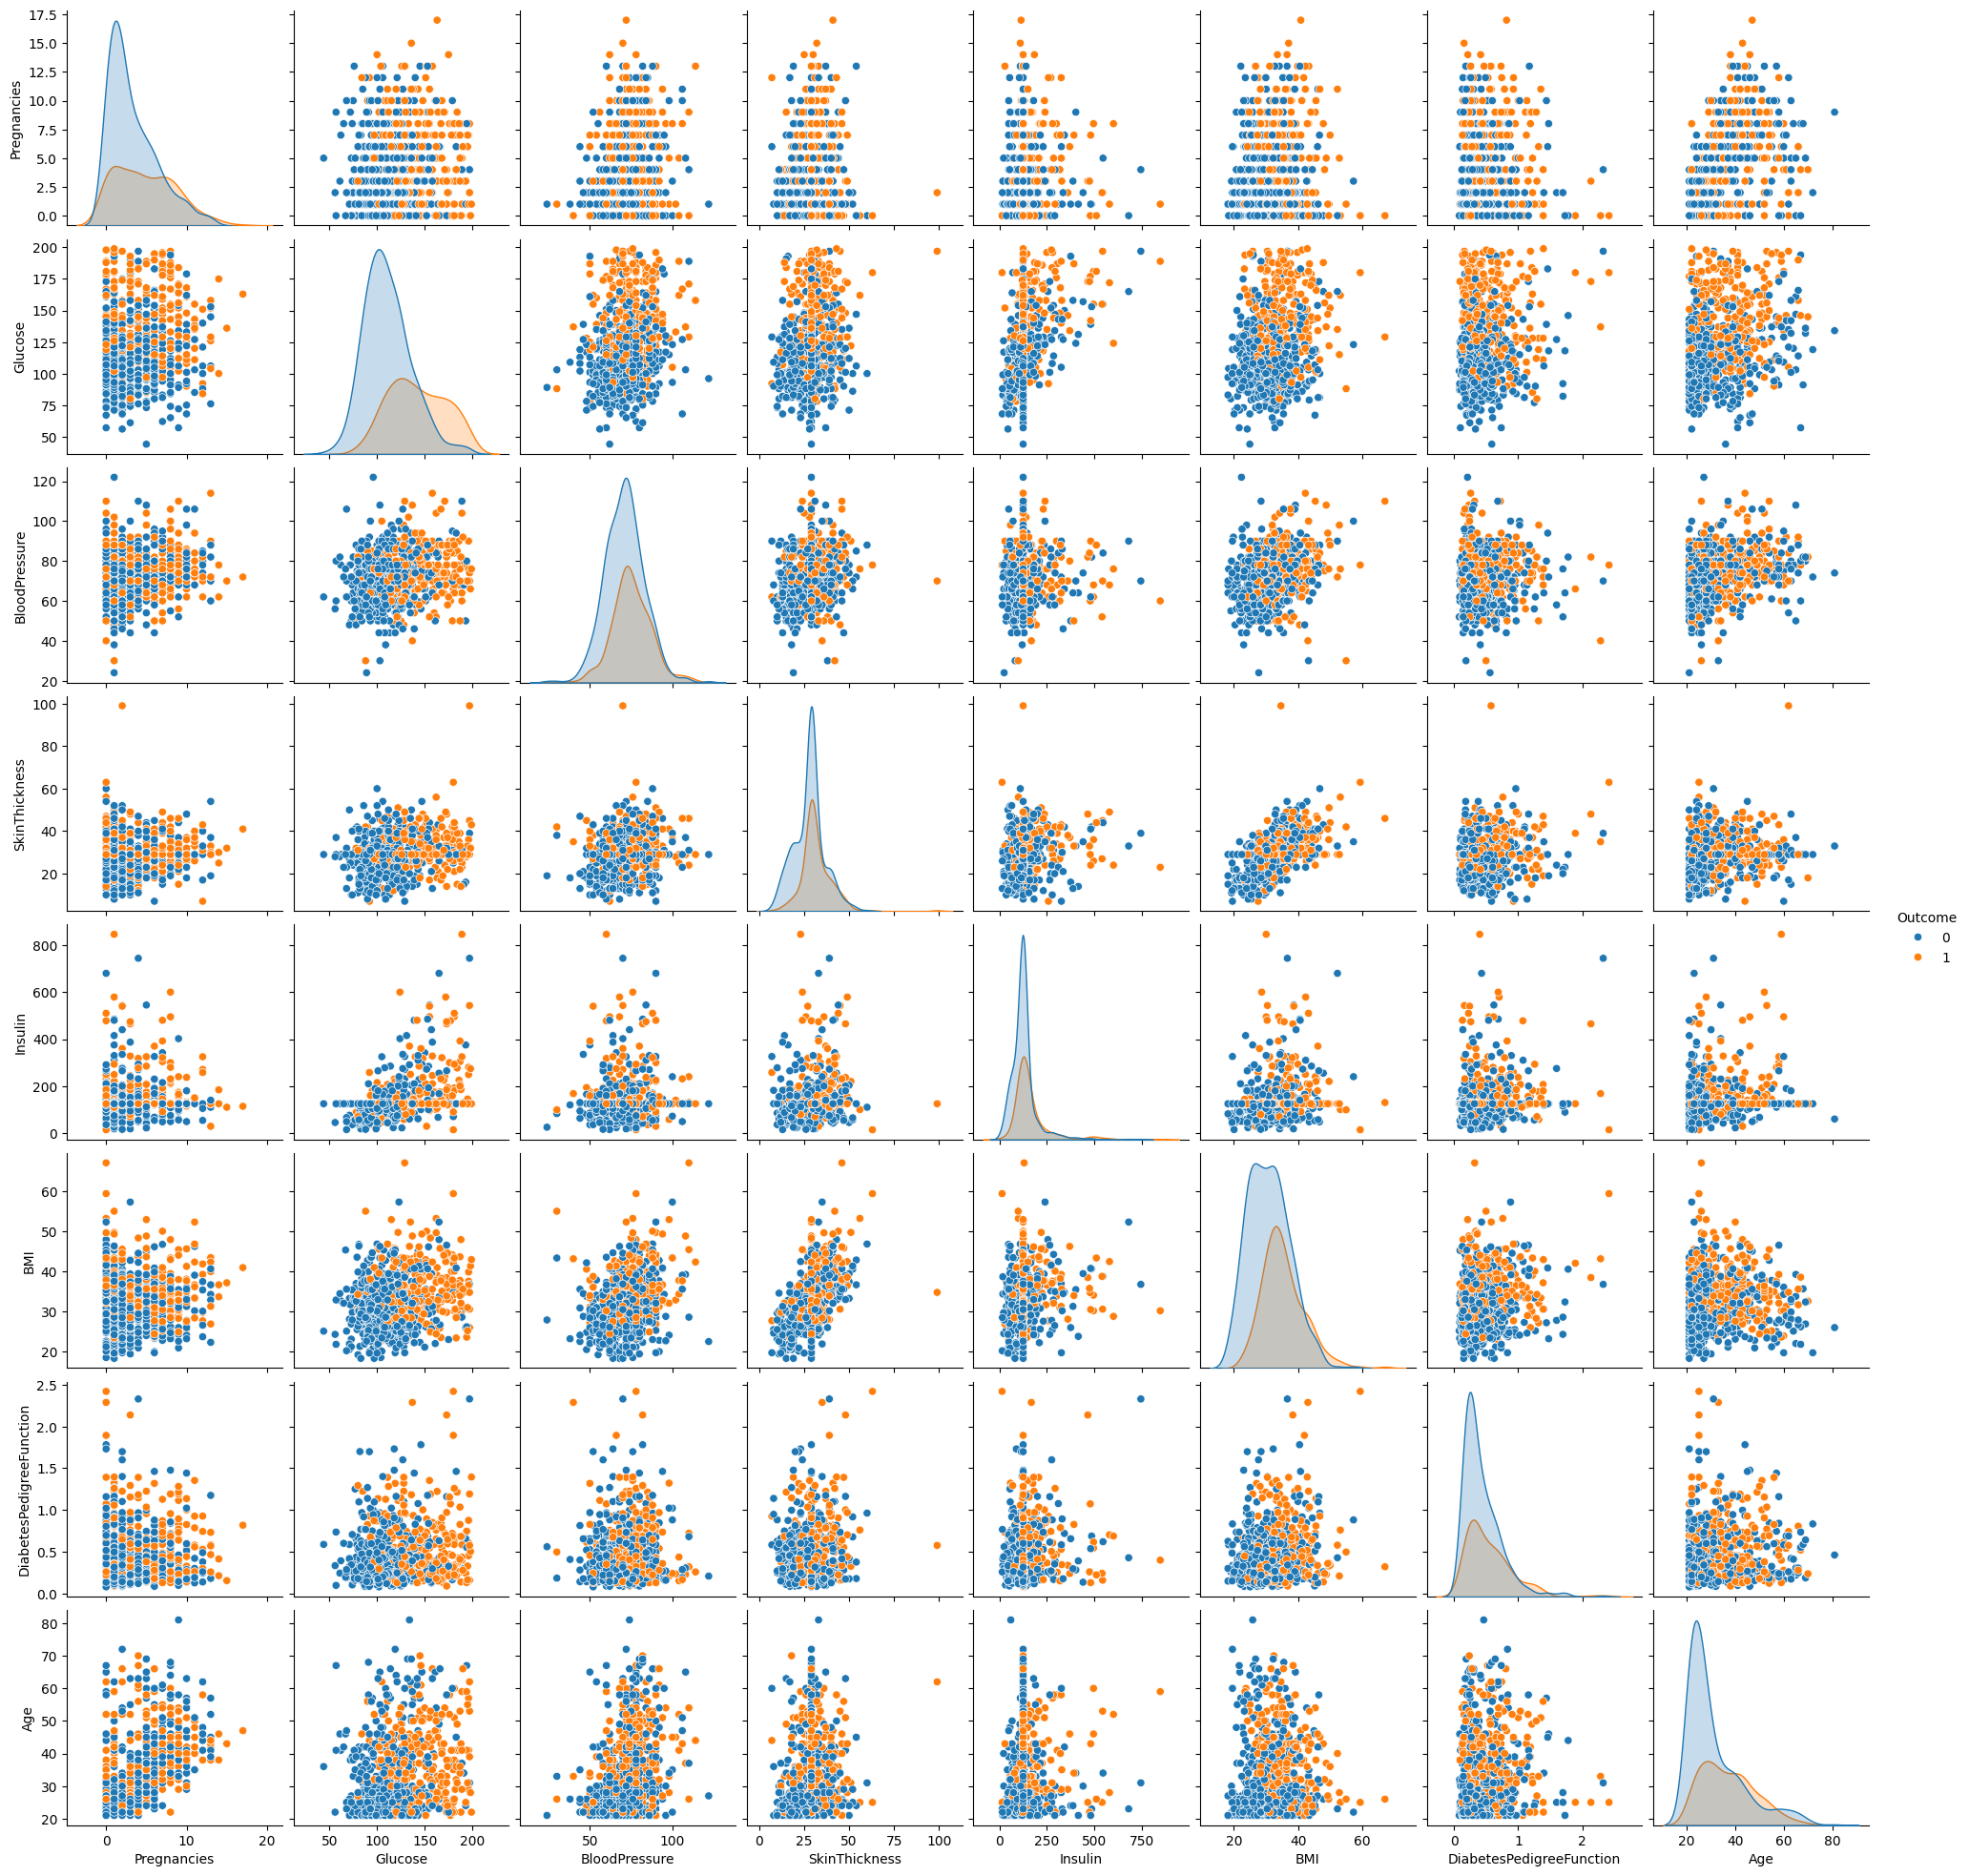

In [37]:
sns.pairplot(df,hue="Outcome")


What we can conclude:

- Two clusters can be observed when comparing glucose and BMI: diabetic patients generally lie in the higher range, while non-diabetic patients cluster in the lower range.

- Patients with diabetes (Outcome = 1) tend to have higher glucose levels, BMI, insulin, and age.

- Non-diabetic patients (Outcome = 0) mostly show lower glucose and BMI values, with relatively younger age.

- Diabetic cases exhibit clear differences in their characteristics compared to non-diabetic ones: they have higher glucose and BMI, while non-diabetic individuals show more normal values in these measures.

- Some features like BloodPressure and SkinThickness lie in between, showing average variations across both groups.

###Heatmap


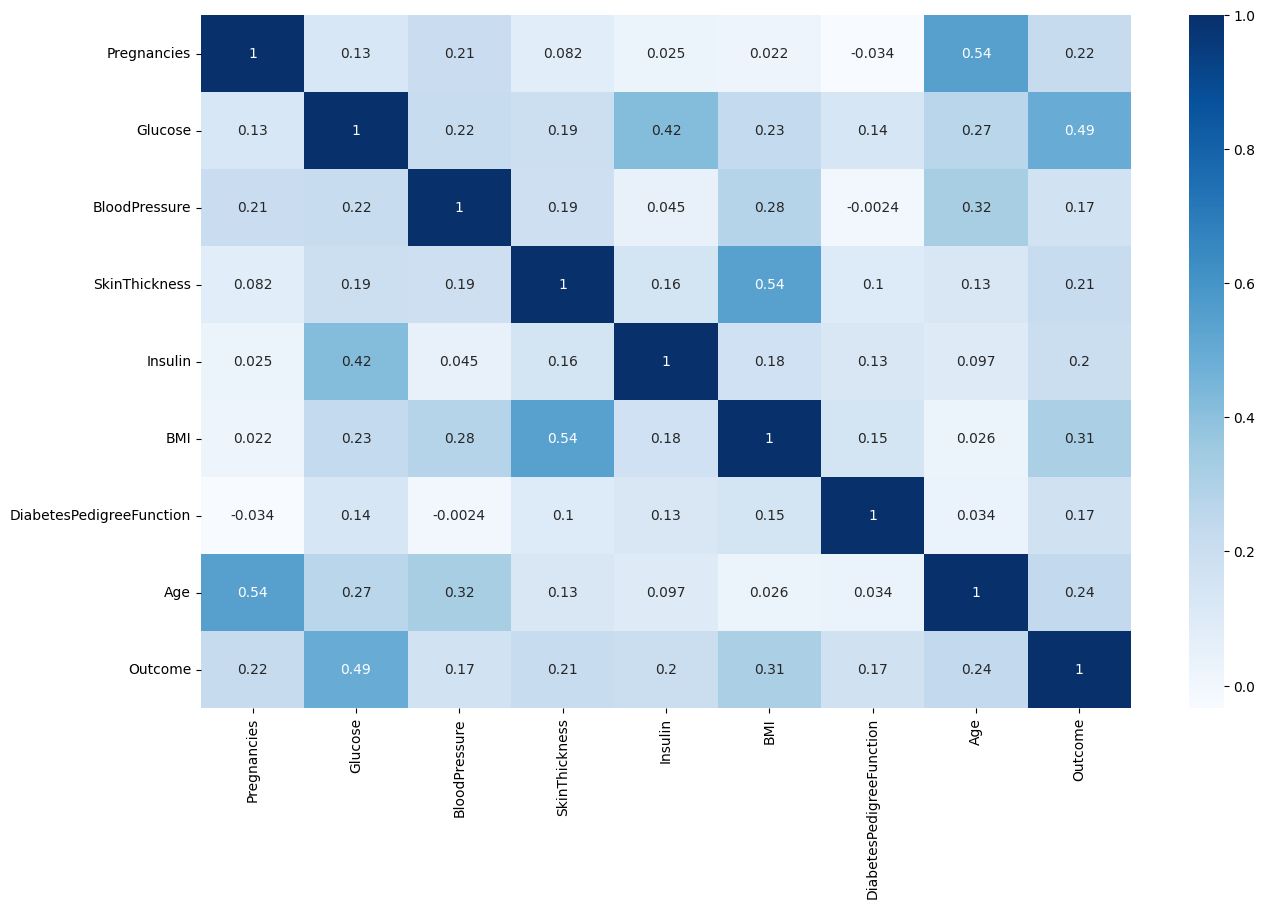

In [38]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

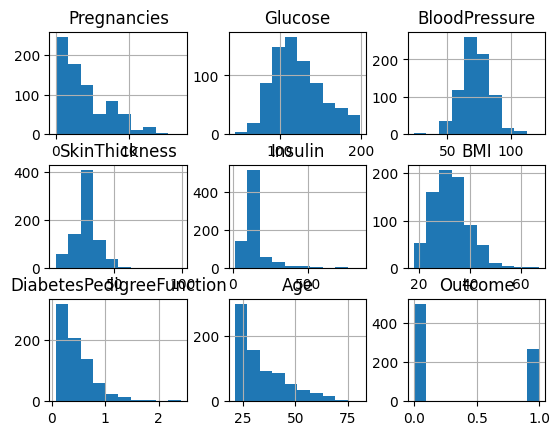

In [39]:
df.hist();


<Axes: xlabel='Outcome', ylabel='Glucose'>

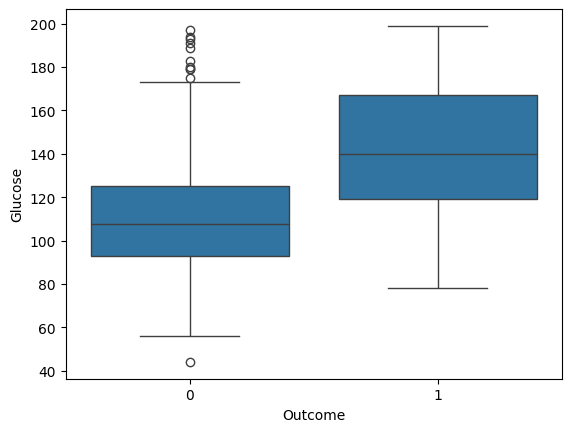

In [41]:
sns.boxplot(x='Outcome', y='Glucose', data=df)


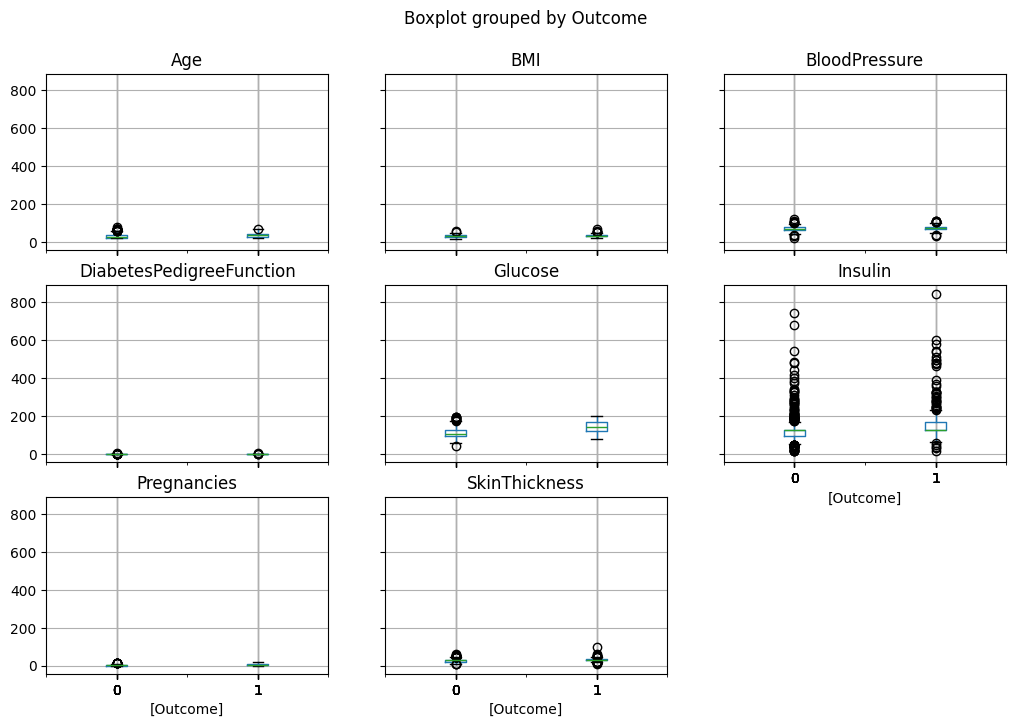

In [42]:
df.boxplot(by="Outcome", figsize=(12, 8));


<Axes: xlabel='Outcome', ylabel='Glucose'>

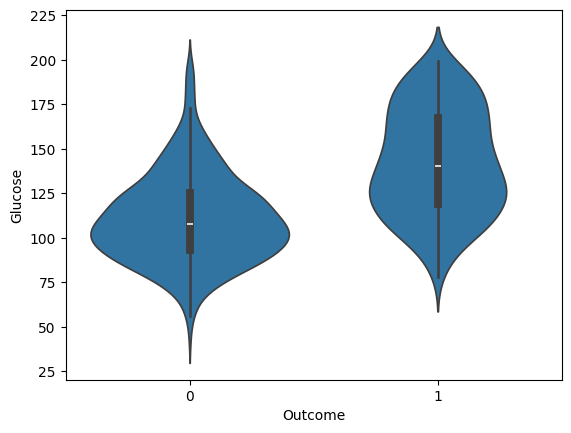

In [43]:
sns.violinplot(x='Outcome', y='Glucose', data=df)
